<a href="https://colab.research.google.com/github/Voland24/MachineLearning-with-PyTorch-and-scikit-learn/blob/main/Chapter_2_ML_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Classifiers

This will be an overview of the various types of ML classifiers that are used today, implemented in sciki-learn.
We will look at algorithms like logistic regression, SVM, decision trees and knn.
We will also look at how we can use the scikit-learn api.

## Choosing an ML classifier

Important thing to note is the "no free lunch theorem", stating that no one classifier is the best one for every single possible scenario. It's common practice to compare the performance of several different learning algorithms in oreder to select the best possible one for the job. The factors could be the number of features, amount of noise in the data and whether or not the classes are linearly separable.
The computational performance of a model as well a sits predictive power will be greatly impacted by the underlying data.
General workflow of implementing a supervised learning algorithm would be:

1. Selecting features and labeled training examples
2. Choosing a performance metric
3. Choosing a learning algorithm and training the model
4. Evaluating the model's performance
5. Further tuning the model to its maximum performance

Here we will implemented the perceptron model, this time in scikit-learn. We will also use the same Iris dataset from the previous model, and only two features of the dataset.
This time, we will use all three classes present in the dataset.

Assing petal length and width of all 150 examples to the feature matrix X and their labels to the coresponding vector y/

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print(f'Class labels {np.unique(y)}')

Class labels [0 1 2]


We can see that the three present classes setosa, versicolor and virgininca have numerical values. This is not only the convetion, but also helps with the computiation of the classifier, leaving a smaller memory footprint as well as helps prevent glitches in the process itself.

In order to evaluate the model's performance, we have to split the data into test(unseen) data and train(seen) data. The model will train on the train dataset and its performance will be used as if the on the real world data with the test data in question.

In this case, 0.3 or 30% of the dataset will be used for testing i.e. 45 examples and the res, 105 examples will be used for training.
Important to note, this function automatically shuffles the data before the split. If it didn't, all the examples of classes 0 and 1 would be in the training data and the test data would all be class 2. Random state seed is used to replicate the results if needed.
Stratify functionality enables us to specify that we want the train and test datasets to have the same ratio of classes internally as the original input dataset.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

print(f'Labels ratio in y {np.bincount(y)}')
print(f'Lables ratio in y_train {np.bincount(y_train)}')
print(f'Labels ration in y_test {np.bincount(y_test)}')

Labels ratio in y [50 50 50]
Lables ratio in y_train [35 35 35]
Labels ration in y_test [15 15 15]


Many ML algorithms require feature scaling before they proceed. Gradient descnet works better and faster if this step is performed. Here we will achieve thiss using the scikitlearn api

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

The **fit** method will estimate the mean and the standard deviation for each feature in the passed dataset. **transform** will standardize all of the features in the dataset with the calculated mean and standard deviation.
Important to note that the test dataset is standardized with the same mean and standard deviation as the training one.

We can now train the Perceptron. Most classifiers support the OvA (One versus All) multi class method of classification by default in scikitlearn. This enables us to feed all three classes at once into the model.

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

random state argument ensures the shuffling of the dataset after each epoch to prevent cycles in learning.

We can now make predictions on the unseen Iris data

In [5]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
err = (y_test != y_pred).sum()
print(f'Number of misclassified examples: {err}')
print(f'Error rate is {(err / len(y_test)*100)}%')
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}%')


Number of misclassified examples: 1
Error rate is 2.2222222222222223%
The accuracy of the model is 0.9777777777777777%


We can now visually inspect how well has the model separated the dataset.

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
 resolution=0.02):
 # setup marker generator and color map
 markers = ('o', 's', '^', 'v', '<')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 lab = lab.reshape(xx1.shape)
 plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot class examples
 for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=f'Class {cl}',
    edgecolor='black')
 if test_idx:
 # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
    c='none', edgecolor='black', alpha=1.0,
    linewidth=1, marker='o',
    s=100, label='Test set')

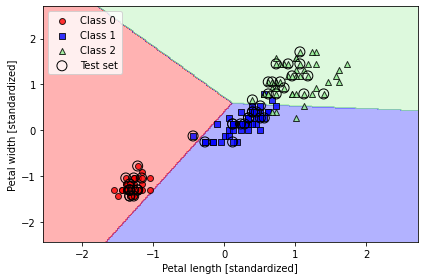

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Even though the classifiers does a pretty good job separating the classes, they cannot be perfectly separated by a linear separator i.e. a decision boundary. This was just an example even though the Perceptron isn't used for situations where there isn't a linear decision boundary. Instead we will use classifier that converge to a minimum of the loss function even if there isn't a linear decision boundary.

# Logistic regression

This an easy to implement classification algorithm used for linearly separable classes. It is a linear model for binary classification.
In cases of multiclass classification, we can use the One versus All technique or we can implement the multinomal logistic regression of softmax regression.

First thing to understand here is the term **odds**, which is basically the ratio of the probabilities of an event **P** happening or not i.e. p / (1 - p).
**p** here is the probability of the so called positive event i.e. the thing we are trying to predict and it's usually class label "1" so
p = p(y=1, x) or probability of y being 1 given the features **x**.

The **logit** function is simply defined as the logarithm of the odds or 
logit(p) = log( p / (1 - p))
This log here in the natural logarithm. The logith function takes inputs from 0 - 1 and scatters them all over the real number range.

Under the logistic model, we assume there is a linear relationship between the weighted inputs and the log-odds

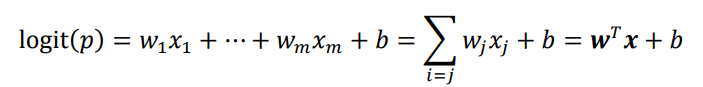


The logit function maps the probability of the given class appearing into the real number range, we can look at the invers function that mapls the real number range into the range [0,1] which we can interpret as the probability of the class appearing. This function is called the sigmoid function.

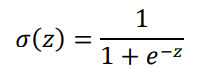

Here **z** is the weighted sum of the inputs, which we consider to be the log-odds.

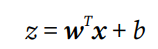

Here is how the sigmoid function looks like

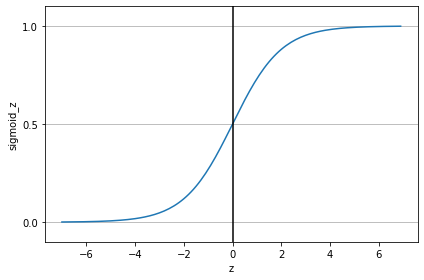

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7,7,0.1) # from -7 to 7 with a step of 0.1
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('sigmoid_z')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

As the z value approaces inf, the sigmoid approaches +1 since exp(-z) becomes very small for larger values. Similarly, if the z values go towards -inf, the sigmoid goes towards 0, since the denominator grows.
So, the sigmoid takes real number  inputs and maps them to the range [0,1] with a y intercept of 0.5.

The only difference between the Adaline model and the logistic regression one is that the activation function in the latter is the sigmoid function.

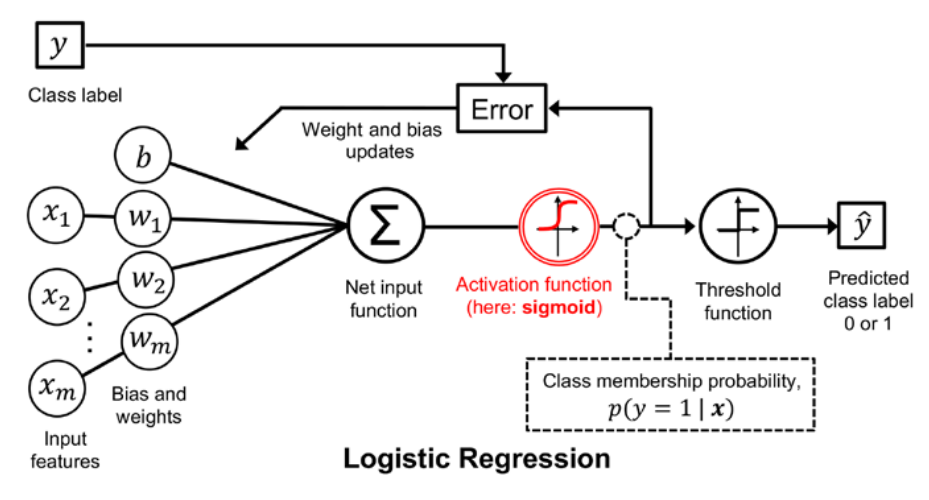

The output of the sigmoid is interpreted as the class probability of a given example. 
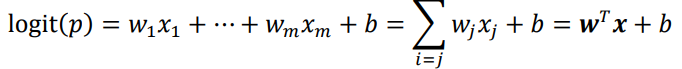

Meaning it's the probability of an example belonging to a specific class given its features **x** parametrized by the weights and the bias term.

We can apply a threshold function to the sigmoid output to get strict binary outputs and thus, a class label prediction

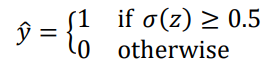

This, without the sigmoid function, means the following

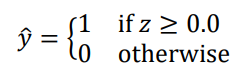

However, sometimes we want not only the specific class label but the confidence the model has in its prediction. We can use the sigmoid outputs and treat them as the model's confidence in a given prediction.

# Learning the model's weights via the logstic loss function

We know how to make predictions based on the inputs and the sigmoid function. However, in order to build a model we must be able to fit the weights and the bias term of the model to the specific scenario.

In the Adaline model, we used the MSE loss function and minimized it to learn the weights and the bias term of the network.

Here, we must first look at the likelihood function we want to **maximize** when we build a logistic regression model under the assumption all of our examples are independant of each other.
This is the formula for likelihood.

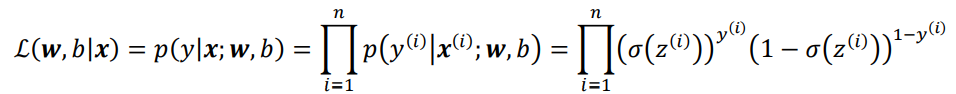

In real use case scenarios, it's easier to maximize the log of the preceding equation, called **log likelihood**

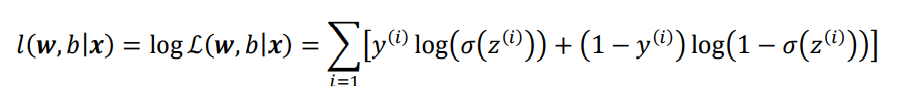

Applying the lof reduces the chances of numerical underflow, which can happen if the likelihoods are very small. (during the multiplication, it can occur)
Also, converting this from a product of factors to a summation, it can help to calculate the derivative of the function during the fitting process.



Now, we can use gradient ascent to maximize the fucntion on log-likelihood and it would work. Alternatively, we can rewrite the log-likelihood function as loss function in the following manner.

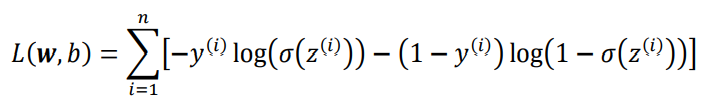

From a single training example, this would look like

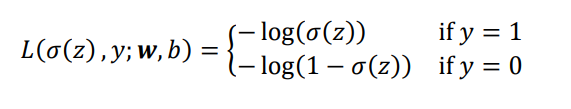

In the following code, we can see how the loss of misclassifying an example for different values of sigmoid(z)



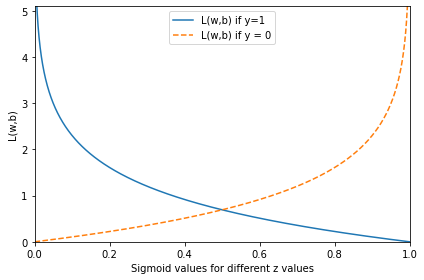

In [9]:
def loss_1(z):
  return -np.log(sigmoid(z))
def loss_0(z):
  return -np.log((1 - sigmoid(z)))
z = np.arange(-10,10,0.01)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label = 'L(w,b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle = '--', label = 'L(w,b) if y = 0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('Sigmoid values for different z values')
plt.ylabel('L(w,b)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

We can see how we penalize wrong predictions here. If the class if y = 1 and we correctly guess 1, the loss (blue line) approaches 0. If the class is y = 1 and we misclassify it, the loss approaches inf the further away we are.
Conversly, the same situation is with class y = 0. If we misclassify it, the loss approaches inf further away we are, and approaches 0 if we guess correctly.

# Adaline implementation converted into a Logistic regression model

All that is needed to change is how we compute the loss function, here we use the logistic regression loss function.
Also, the activation is no longer linear and is now a sigmoid function.
The following code is for full batch GD, it works the same with mini batch or stochastic GD.

In [10]:
class LogisticRegressionGD:
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    # X array, shape [n_examples, n_features]
    # y array, shape [n_examples] targets
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]) #average loss per epoch
      self.losses_.append(loss)
    return self
  def net_input(self,X):
    return np.dot(X, self.w_) + self.b_
  def activation(self, z):
    return 1.0 / (1 - np.exp(-np.clip(z, -250,250))) #keep z values in this range
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
  


Let's check the implementation for classes 0 and 1, setosa and versicolor that is

<ipython-input-10-9656d422a71e>:20: RuntimeWarning: invalid value encountered in log
  loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]) #average loss per epoch
<ipython-input-10-9656d422a71e>:20: RuntimeWarning: divide by zero encountered in log
  loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]) #average loss per epoch


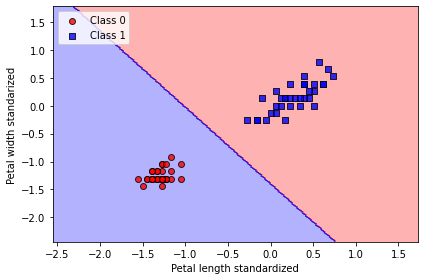

In [11]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1) ] #get only classes 0 adn 1
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1) ] #and their labels

log_regression = LogisticRegressionGD(eta = 0.3, n_iter = 100, random_state = 1)
log_regression.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = log_regression)
plt.xlabel('Petal length standardized')
plt.ylabel('Petal width standarized')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

This is how we calculate the derivative update rule here. We apply the chain rule in derivatives to find the final derivative. Then we simply add the derivative*(-1) i.e. opposite direction to the weight vector to perform the update.

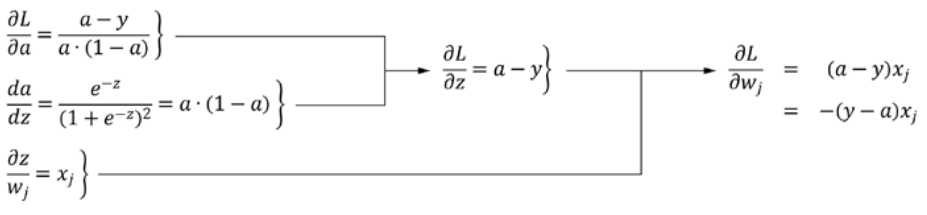

# Logistic regression in scikit-learn

We will perform log regression here, on all three classes of the Iris dataset. This is the default setting using the scikit learn logistic regression classifier. It can work in OvR or multinomal mode.
Multinomal is prefferable and is more commonly used, especially if the classes are mutually exclusive meaning one example can belong to only one class.



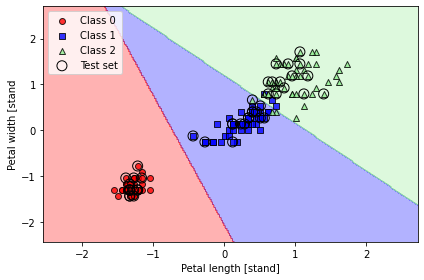

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx = range(105,150))
plt.xlabel('Petal length [stand]')
plt.ylabel('Petal width [stand')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

There are many algorithms used to solve optimization problems. For minimizing convex loss functios, such as the logistic regression loss, it's better to use something more advanced than SGD. We can use newton-cg, lbfgs, liblinear, sag,saga.

The parameter C is used to prevent overfitting and is used for regularization, and this will be covered in the next notebook.

In order to predict the classes the first three flowers in the dataset, we can use 

In [13]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

The first row has three values, one for each class. It represents the probabilities that the first flower, row 1, belongs to each class. The max value row-wise the class than the model predicts.

In [14]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis = 1) #row wise max for each row
# OR
lr.predict(X_test_std[:3,:]) #the same thing

array([2, 0, 0])

If we want to predict a single example, scikit learn expects a 2d array as the input. So we simply convert the vector into the needed shape

In [15]:
lr.predict(X_test_std[0,:].reshape(1,-1))


array([2])

# Overfitting and regularization

The overfitting problem is depicted in the model performing very well on the training set but it falis to generalize to the test set i.e. the unseen data examples. This is synonymous with saying the model has high variance, meaning it has too many parameters and is too complex for the dataset it trains on.
The opposite situtation is called underfitting or high bias models, meaning our model is too simple to capture the pattern in the data adequately and therfore performs poorly on new data.

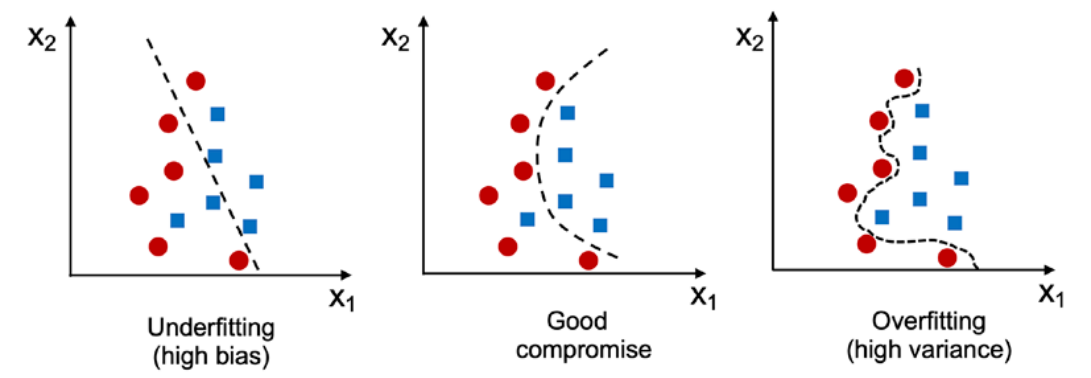

This is called the variance/bias tradeoff.

Variance simply put, describes the variance of the model's prediction for classifying a particular example if we train on multiple times, on different subsets of the data. If the model has variance it means that it is too sensitive to the randomness of the data in the training set. Bias describes how far off the model is from the correct values if we retrain the model multiple time on different dataset or subsets. Bias is a measure of systematic error and not due the randomness of the dataset.

One way of handling the bias/variance tradeoff is to tune the complexity of the model via regularization methods.
Regularization can help with colinearity of the features, filtering noise from data and prevent overfitting.

The core idea is to add additional info to penalize high values of the weigths in the model. The most common one to use is called L2 norm or weight decay.

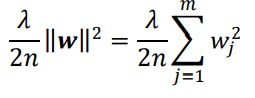

Lambda here is the regularization parameter. The 2 in the denominator is simply a scaling factor and it helps with computing the loss gradient later on. The sample size n is also added to scale the regularization term.
For regularization to work properly, we must first standardize the features and normalize them, so they are all on the same scale, as well as the regularization term. This will ensure its value makes sense.
This is how regularization would look like in the logistic regression example
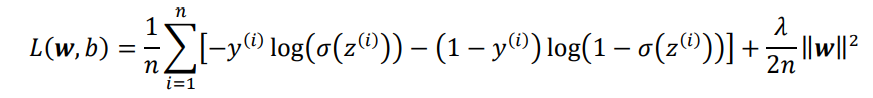

After the partial derivative, we are left with


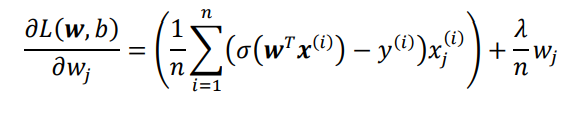

But scaling the lambda term we can choose how much we would like to penalize the weight size. Lambda = 0, ensure no regularization.
The bias term is usually not regularized.

The term C which comes with the scikit learn implemntation of Logistic regression is the inverse of the lambda term but holds the same context. The more we decrease the C term, the harder we penalize weight values and vice versa.


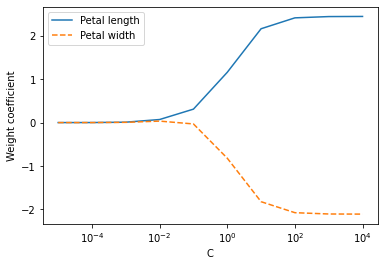

In [16]:
weights, params = [], []
for c in np.arange(-5,5):
  lr = LogisticRegression(C = 10.**c, multi_class = 'ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = 'Petal length')
plt.plot(params, weights[:,1], linestyle = '--', label = 'Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

We have fitted ten different logistic regression models here, all with different values for C. We can see as we increase the C value, the coefficients for weigths grow, and vice versa. Note, since we are using OneVersusRest multiclass technique, here we collect only the weights for the class 1, iris versicolor.

Why not regularize always to the max? Because if the regularize too much i.e. penalize the weight scale too much and the weight's coefficients approach zero and we keep penalizing, we can be left with an underfitted model, since some inputs will be scaled with a value close to zero for the weight parameter.

# Maximum margin classifiers with Support vector machines

This algorithm, SVM, can be considered an extension to the perceptron. There, we were trying to minimize the misclassification error of the model. In the SVM case, we are trying to maximize the margin.
The margin is defined as the distance between the hyperplane that is the decision bounday and the training examples closest to it, called support vectors.

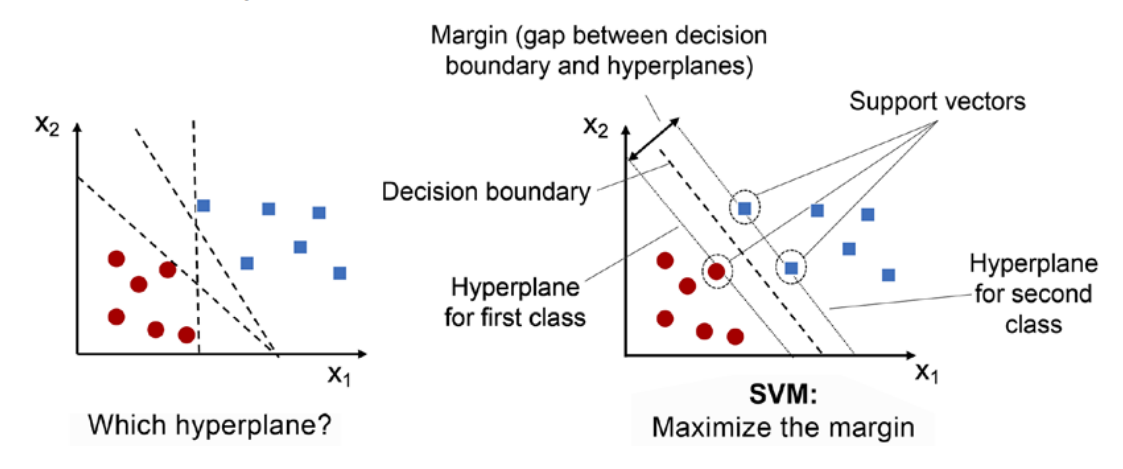

The idea behind maximizing the margin value is that model's that achieve a greater value for the margin are good at generalizing and making fewer mistakes in classification on newer examples. The smaller the margin, the higher are the chances of the model being prone to overfitting.



The so called slack variable exists in the SVM to relax its linear constraints in the optimization objective in order to deal with nonlinearly separable data and allow convergence of the optimization in presence of misclassifications with the appropriate loss penalization.
The term is reffered to as C in the SVM context and it use is to control how hard we want to penalize misclassification erros.
Large values corespong to larger error penalties and vice versa.
C basicaly controls the width of the margin and thus can help us find the best bias/variance tradeoff.

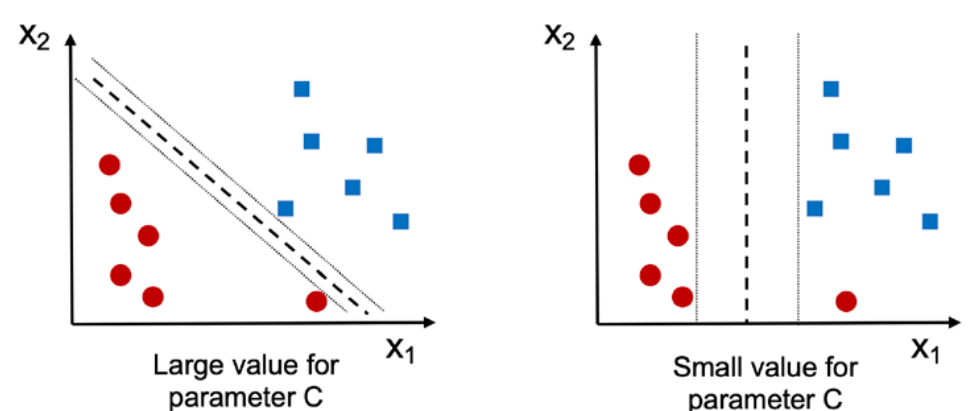

This behaves in a similar fashion the regularization term, lambda, from earlier.

Let's now train an SVM on the Iris dataset.

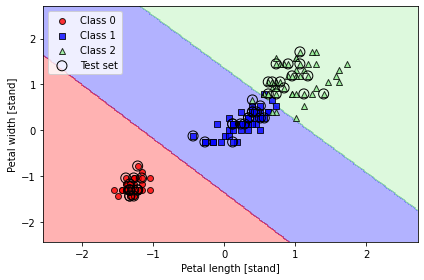

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105,150))
plt.xlabel('Petal length [stand]')
plt.ylabel('Petal width [stand]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Linear SVM and logistic regression models often yield fairly similar results. Logistic regression tries to maximize the conditional likelihood of the training data and that makes it more prone to outliers than the SVM models, that only care about the points closes to the decision boundary.
However, logistic regression models are simpler than SVMs and can be implemented more easily, and are easier to explain. Also, they can be more easily updated, which is a plus when dealing with streaming data. 

Another reason why SMVs are highly useful and popular are the so called kernalized SVMs. These are SVMs used to deal specifically with nonlinear decision boundaries in the dataset.
Let's first look at how a nonlinearized dataset would look like.
We will take the famous example of an XOR gate ouput dataset, which was among the first noticed problems of the inability of linear decision boundary model to deal with.

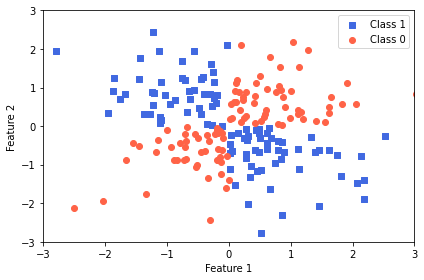

In [18]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0) #100 examples of class 1, 100 examples of class -1
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor == 1, 1], c = 'royalblue', marker = 's', label = 'Class 1')
plt.scatter(X_xor[y_xor == 0,0], X_xor[y_xor == 0, 1], c = 'tomato', marker = 'o', label = 'Class 0')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

We get a XOR gate output dataset with random noise.

This obviously cannot be solved using a linear model, such as logistic regression or the linear SVM.



The basic idea behing kernel SVMs is to create a nonlinear combination of the original features to project them into a higher dimensional space via a mapping function, "fi", where the data would be linearly separable.

We can transform a 2d dataset into a new 3d space, using the following projection, and there the data would be linearly separable.

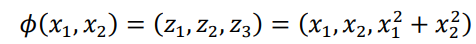

This will allow us to create a linear hyperplane to separate the datapoints in the new, higher dimensional space, which would look nonlinear if we were to project it back into the original space of the features.

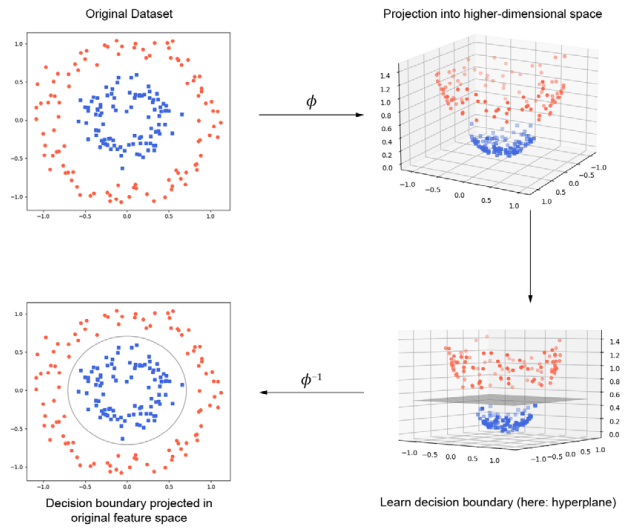

So far, we have a strategy. Use the mapping function on the training dataset, transform the dataset into a higher dimensional space, train a linear SVM to separate the datapoints there. Then, use the mapping function on the unseen data to transform it into the higher dimensional space and classify it there.

However, there is a problem here. The mapping of features into a higher dimensional space is rather computationally expensive, especially if we are dealing with a large dataset. This is where the kernel trick comes into play.

In practice, all is needed to be done is to replace the term of x(i)T * x(j) with the fi(x(i))T * fi(x(j)).
The mapping function passes through our computation of the values.

So we switch the expensive step of calculating the dot product between two points explicitly and define a kernel function as such

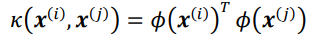

One of the most commonly used kernels is the Radial or Gaussian kernel which is the following one

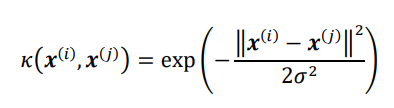

The denominator term in the exponent is a free parameter that is to be optimized.
The kernel can be thought of as a similarity function between two points. The minus sign is to there to invert the distance measure into a similarity score and the exponent is used to contain the outputs between 0, for completely dissimilar examples, and 1, for exactly the same examples.

Now, let's train a nonlinear SVM to solve the XOR gate dataset.
We simply substitute the 'linear' part for the 'rbf'

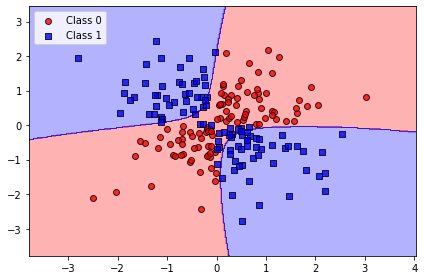

In [19]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.10, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

The model did rather well. The gamma term is the denominator in the rbf kernel and it is used as a cutoff term for the Gaussian sphere. If we were to increase the gamma term, we would increase the reach of the training examples, which would lead to a tighter and more bumpy decision boundary.


Let's see the gamma impact on the SVM with and rbf kernel on the Iris dataset


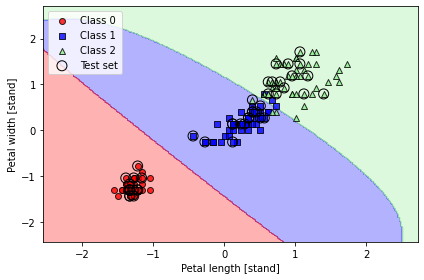

In [20]:
svm = SVC(kernel = 'rbf', gamma = 0.2, C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105,150))
plt.xlabel('Petal length [stand]')
plt.ylabel('Petal width [stand]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Since the gamma value is relatively small, the decision boundaries are softer and less bumpy

Now, if we increase the gamma value to 100, we get

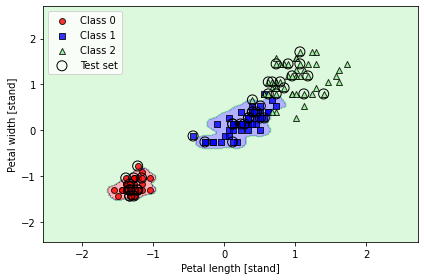

In [21]:
svm = SVC(kernel = 'rbf', gamma = 100, C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105,150))
plt.xlabel('Petal length [stand]')
plt.ylabel('Petal width [stand]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

We see that we have a much tighter boundary around classes 0 and 1. This seems good, but this model would fail to generalize well on unseen data for this dataset. This just shows that it's important to optimize the hyperparameters of the models we train to get the maximum performance possible.

# Decision tree learning

The best models to consider if we mean to add interpretabillity to our predictions. The whole idea can be surmized as such, we break down the data as if we were asking a lot of questions.

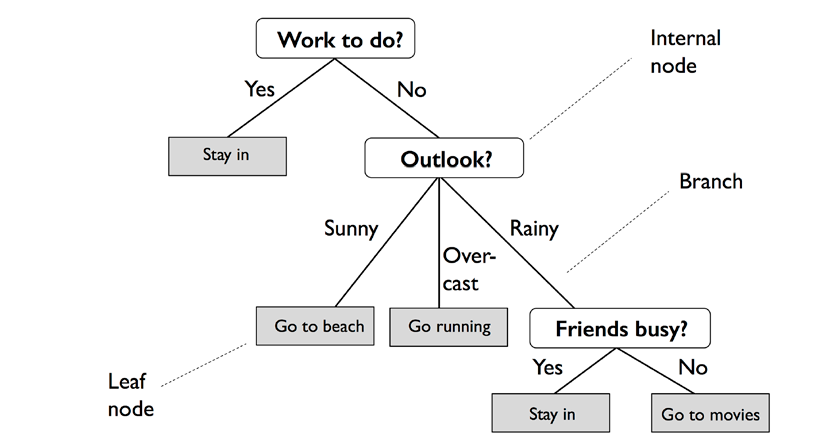

This works well even with numerical values, instead of asking Yes/No questions we find a cutoff value such as "sepal_width > 5"

The idea is to start at the tree root (whole dataset) and work to  split the data by a feature that splits the dataset with the most information gain. We repeat ths, iteratively, until the child nodes or the leaves are pure, meaning all (or most) examples belong to the same class.
This can however lead to very deep trees and overfitting, and that's why we utlize tree prunning to find the maximum tree depth.

To split the set by its most informative features, we must define what the objective function is that we are trying to maximize via the tree learning algorithm. We try to maximize it at each split point.

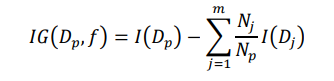

* Dp is the parent set of examples
* Dj is the child set of examples left after split 
* f is the feature on which we perform the split
* Np is the total number of points in the parent set
* Nj is the total number of points in the jth split
* I is our impurity measure

We can interpret this as the difference between the parent's impurity and the sum of impurities of the children. The smaller the sum of the children's impurities, the bigger the information gain we get by splitting on the feature f

Most libraries, including scikit learn, utilize binary decision trees to reduce the combinatorial search space and ease off the calculation. Meaning each split is performed by right and left child.

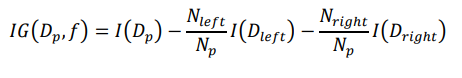

The three impurity functions we use are
* Gini index
* Entropy
* Classification error

**Entropy** for all non-empty classes is defined as follows 

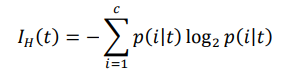

Here, p(i/t) is the proportion of examples that belong to the class i, given the examples in node t.
Therefore, for entropy 0, we have all of the examples for node t belonging to the same class i. Meaning the p(i/t) would be 1, and the log would be 0.
If we have a uniform distribution, meaning all classes occupy the same ratio of examples, the entropy is maximal.

We can see this in the following examples, for different class distributions

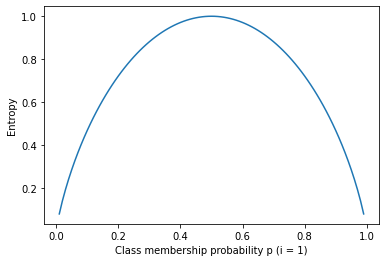

In [22]:
def entropy(p):
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x ]
plt.ylabel('Entropy')
plt.xlabel('Class membership probability p (i = 1)')
plt.plot(x, ent)
plt.show()

As the class probability lessens or increases we can see how the entropy functions drops, the more the sets become homgenous. Only for a perfect uniform distribution, we would have the max entropy.

**Gini impurity**

We can understand it as a criterion to try and minimize the probability of misclassification. 

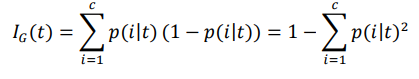

Similar to entropy, the Gini impurity is maximal is the classes are perfectly evenly mixed, for example two classes that each occupy half of the examples

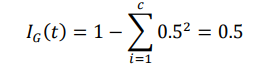

Gini and the entropy one both have similar shapes and similar results. It is much more prudent to think about different cutoff or prunning points for the depth of the tree rather than try to pick a different impurity function.

**Classification error** is another impurity measure.

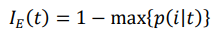

This is a useful criterion for prunning trees but not one for growing them, since it's much less sensitive to changes in class probabilities of nodes.

Consider the following example to best see the difference between the impurity criteria

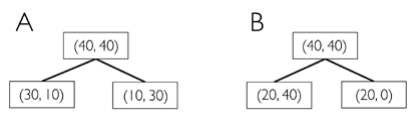


We have a dataset Dp with 80 examples, split 40,40 between classes and two possible ways to split them via a certain criteria. Which split is better?

Given the classification error one, we would get 

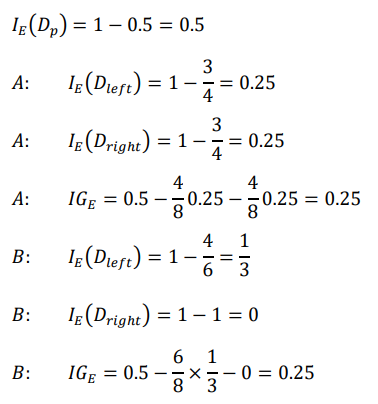

It would favour both of them the same and treat them the same.

However, both the Gini index 

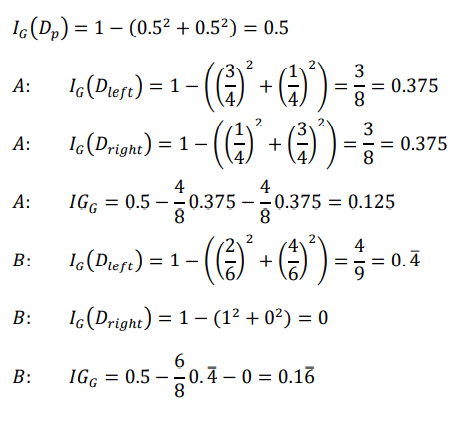

And the entropy impurity criterion

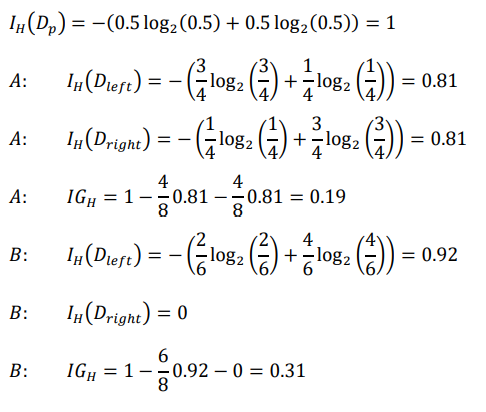

Would favour the B split, which is indeed more pure, as it enables us to wholly split the class 0 examples into the right child.


We can plot the functions of all three impurity criteria and we cann see how they change with the class probabilities for a certain class. We also add the scaled entropy by 0.5 to show that the gini index is in the middle between entropy and classification error.

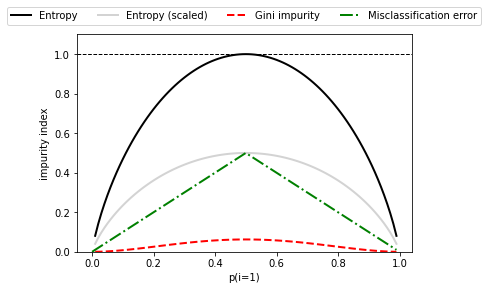

In [26]:
def gini(p):
  return (p  * (1 - p))**2
def entropy(p):
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
def class_error(p):
  return 1 - np.max([p, 1-p])
x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e* 0.5 if e else None for e in ent]
err = [class_error(p) for p in x]
gini = [gini(p) if p!=0 else None for p in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini, err],
                         ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray','red', 'green', 'cyan']):
  line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5,1.15), ncol = 5, fancybox = True, shadow = False)
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

# Build a decision tree

Decision trees can create complex decision boundaries while separating the area into rectangles. However, the downside, the deeper the tree, the more complex the boundary becomes and the tree can overfit easily.

We will now train a decision tree with a depth of 4 with Gini impurity as a impurity criterion. 

Note, feature scaling was important with logistic regression and the perceptron beacuse of convergence issues and the speed of convergence as well as regularization. Here, decision trees do not need normalization or feature scaling to work.

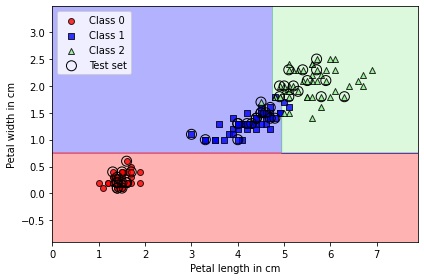

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier = tree_model, test_idx = range(105,150))
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

The model its job rather well and we get typical axis-parallel decison boundaries we get with decision trees.

We can also easily interpret the model, this is a big plus for the decision trees.

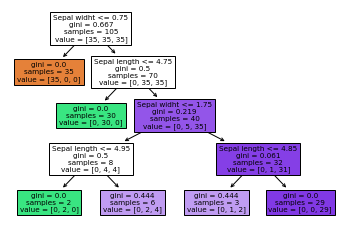

In [28]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal widht', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names = feature_names, filled = True)
plt.show()

Left branches are True and right ones are False. filled = True, just means to color the set with the majority class color if such exists.

Scikit learn doesn't let the user prune the tree after it was trained. However, we can manually see want would happend if we were to make the tree have max depth 3

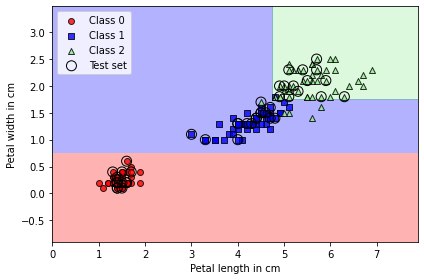

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier = tree_model, test_idx = range(105,150))
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

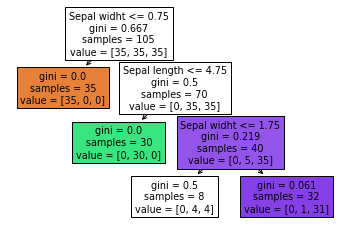

In [30]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal widht', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names = feature_names, filled = True)
plt.show()

# Random forests

This is one of the ensemble methods used today. Ensemble methods, in general, are good for classification performance and they are robust towards overfitting. 
Random forest models are easy to use and are scalable easily. They can be thought of as an ensemble of decision trees.

The idea here is to use multiple deep decision tree that each suffers from high variance i.e. overfitting to build a more robuster model that has a better performance on generalization and is less susceptible to overfitting.
The steps are as follows:

1. Draw a random bootstrap sample of size n i.e. choose n random examples from the dataset. with replacement
2. Grow a decision tree based on the bootstrap sample. At each node:
  * randomly choose d features without replacement
  * split the node set with a feature from the d features, choose  the one that maximizes the information gain 
3. Repeat steps 1 and 2 k times
4. Make the final prediciton by taking all the tree's predictions and doing a majority vote.

Random forests are worse off wor interpretability, however we don't have to worry about choosing a good hyperparameter. We also don't need to prune the trees since the ensemble model iself can deal with the noise because it averages out the predicitons that are made.
The only hyperparameter that we worry about is the k, i.e. the number of trees we make.
The tradeoff is this, the more trees we have, the better the performance at the expence of the computational cost.

Although less common, we could also optimize the parameters n, the sample size and the parameter d, the number of features chosen. Via the sample size n, we make a bias/variance tradeoff with the random forest model. The smaller the n is, it creates more diverse samples and can help the model reduce variance and be less prone to overfitting. However, too small of a sample size and the performance drops. Increasing the sample size too much, leads to more similar samples and thus more similar trees even with the choosing of random parameters, and can increase the chances of overfitting.

In sciki learn the n size is the number of training examples in the training set, which is a good tradeoff value.
The d, number of randomly chosen features is the square root the number of features in the training dataset.

Here is an implementation

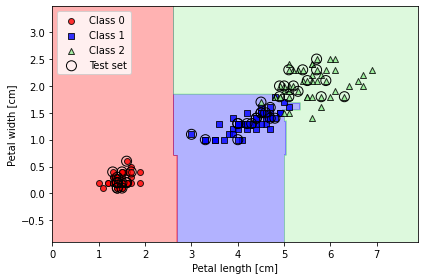

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 25, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx = range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

We trained 25 different decision trees for this problem.
scikit learn used Gini impurity by default
n_jobs just allows us to paralelize the process of growing the trees by utilizing n_jobs CPU cores on our computer. We could further paralelize this by employing the use of a GPU and all of its cores.